In [2]:
#data handling/prediction
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.preprocessing import Imputer

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [4]:
data = pd.read_csv("MVC.csv")
print(data.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'NUMTIME'],
      dtype='object')


In [5]:
feature_cols = data.columns[4]
resp_col = data.columns[11]
x = data[feature_cols].copy()
y = data[resp_col].copy()

In [6]:
def borough(x):
    if x=="QUEENS":
        return 1
    if x=='BROOKLYN':
        return 2
    if x=='MANHATTAN':
        return 3
    if x=='BRONX':
        return 4
    if x=='STATEN ISLAND':
        return 5

In [7]:
data['BOROUGH2']=data['BOROUGH'].apply(borough)
print(borough)

<function borough at 0x1a1cfe0560>


In [8]:
valuablecols=['NUMTIME','BOROUGH']
def replace_missing_value(data, valuablecols):

    imputer = Imputer(strategy="median")
    df_num = data[valuablecols]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def
data["NUMTIME"] = replace_missing_value(data,["NUMTIME"])
data = data.dropna(how='any', subset=['BOROUGH','NUMTIME','NUMBER OF PERSONS INJURED','LONGITUDE','LATITUDE','CONTRIBUTING FACTOR VEHICLE 1'])
print(data.isnull().any())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


CRASH DATE                       False
CRASH TIME                       False
BOROUGH                          False
ZIP CODE                          True
LATITUDE                         False
LONGITUDE                        False
LOCATION                         False
ON STREET NAME                    True
CROSS STREET NAME                 True
OFF STREET NAME                   True
NUMBER OF PERSONS INJURED        False
NUMBER OF PERSONS KILLED          True
NUMBER OF PEDESTRIANS INJURED    False
NUMBER OF PEDESTRIANS KILLED     False
NUMBER OF CYCLIST INJURED        False
NUMBER OF CYCLIST KILLED         False
NUMBER OF MOTORIST INJURED       False
NUMBER OF MOTORIST KILLED        False
CONTRIBUTING FACTOR VEHICLE 1    False
CONTRIBUTING FACTOR VEHICLE 2     True
CONTRIBUTING FACTOR VEHICLE 3     True
CONTRIBUTING FACTOR VEHICLE 4     True
CONTRIBUTING FACTOR VEHICLE 5     True
COLLISION_ID                     False
VEHICLE TYPE CODE 1               True
VEHICLE TYPE CODE 2      

In [12]:
def injured_to_binary(x):
        if x>= 1:
            return 1
        else:
            return 0
data['affected']=data['NUMBER OF PERSONS INJURED']+data['NUMBER OF PERSONS KILLED']
data['affected'] = data['affected'].apply(injured_to_binary)
data['NUMBER OF MOTORIST INJURED'] = data['NUMBER OF MOTORIST INJURED'].apply(injured_to_binary)
data['NUMBER OF PEDESTRIANS INJURED'] = data['NUMBER OF PEDESTRIANS INJURED'].apply(injured_to_binary)
data['NUMBER OF CYCLIST INJURED'] = data['NUMBER OF CYCLIST INJURED'].apply(injured_to_binary)

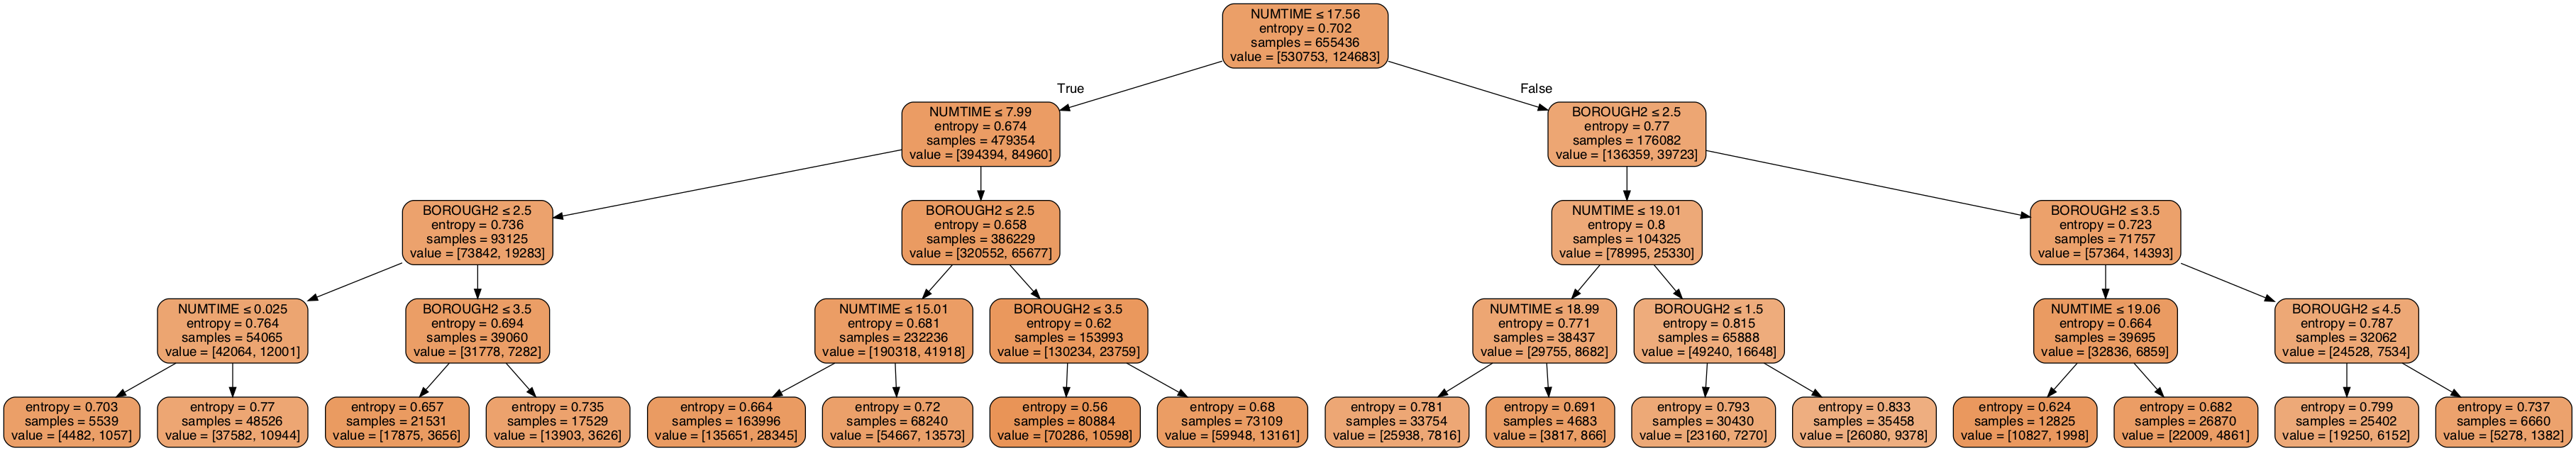

In [11]:
X_feat = data[['NUMTIME','BOROUGH2']]
y = data['affected']
t = DecisionTreeClassifier(max_depth=4,criterion='entropy')
t.fit(X_feat,y)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [12]:
X_feat = data[['NUMTIME','BOROUGH2']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.809090
2   0.809090
3   0.809090
4   0.809090
5   0.809075
10  0.809021
15  0.808770
20  0.808426
25  0.808259
30  0.808091


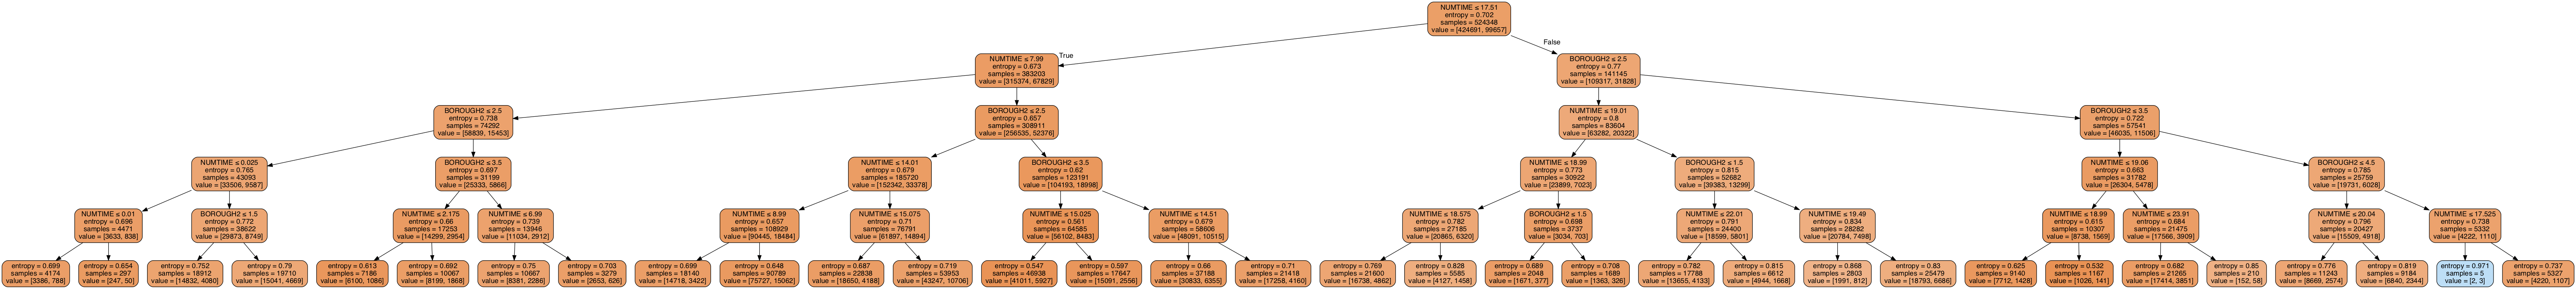

In [13]:
t = DecisionTreeClassifier(max_depth=5,criterion='entropy')

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [14]:
pd.DataFrame({'feature':['NUMTIME','BOROUGH2'], 'importance':t.feature_importances_})


,feature,importance
0,NUMTIME,0.595667
1,BOROUGH2,0.404333


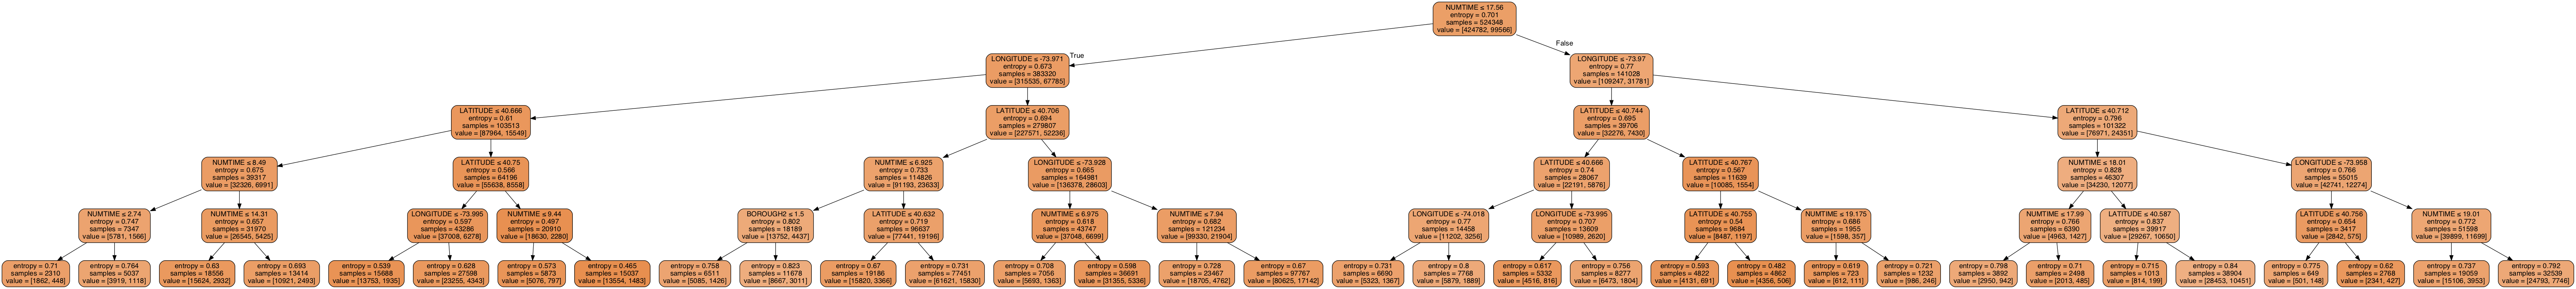

In [15]:
X_feat = data[['NUMTIME','BOROUGH2','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=5,criterion='entropy')

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [16]:
pd.DataFrame({'feature':['NUMTIME','BOROUGH','LATITUDE','LONGITUDE'], 'importance':t.feature_importances_})



,feature,importance
0,NUMTIME,0.393684
1,BOROUGH,0.006060
2,LATITUDE,0.312177
3,LONGITUDE,0.288080


In [15]:
X_feat = data[['NUMTIME','BOROUGH2','LATITUDE','LONGITUDE']]
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3,4]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  7.5min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,5,1,10,0.809772
1,gini,1,1,10,0.809771
2,entropy,2,1,60,0.809771
3,entropy,2,2,20,0.809771
4,entropy,2,2,30,0.809771
5,entropy,2,2,40,0.809771
6,entropy,2,2,50,0.809771
7,entropy,2,2,60,0.809771
8,entropy,2,3,10,0.809771
9,entropy,2,3,20,0.809771


In [16]:
X_feat = data[['NUMTIME','BOROUGH2']]
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.3min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,1,1,10,0.809771
1,entropy,2,1,20,0.809771
2,entropy,3,1,20,0.809771
3,entropy,3,1,10,0.809771
4,entropy,2,2,60,0.809771
5,entropy,2,2,50,0.809771
6,entropy,2,2,40,0.809771
7,entropy,2,2,30,0.809771
8,entropy,2,2,20,0.809771
9,entropy,2,2,10,0.809771


In [17]:
X_feat = data[['NUMTIME','LATITUDE']]
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  3.0min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,1,1,10,0.809771
1,entropy,3,1,60,0.809771
2,entropy,3,1,40,0.809771
3,entropy,3,1,30,0.809771
4,entropy,3,1,20,0.809771
5,entropy,3,1,10,0.809771
6,entropy,2,2,60,0.809771
7,entropy,2,2,50,0.809771
8,entropy,2,2,40,0.809771
9,entropy,2,2,30,0.809771


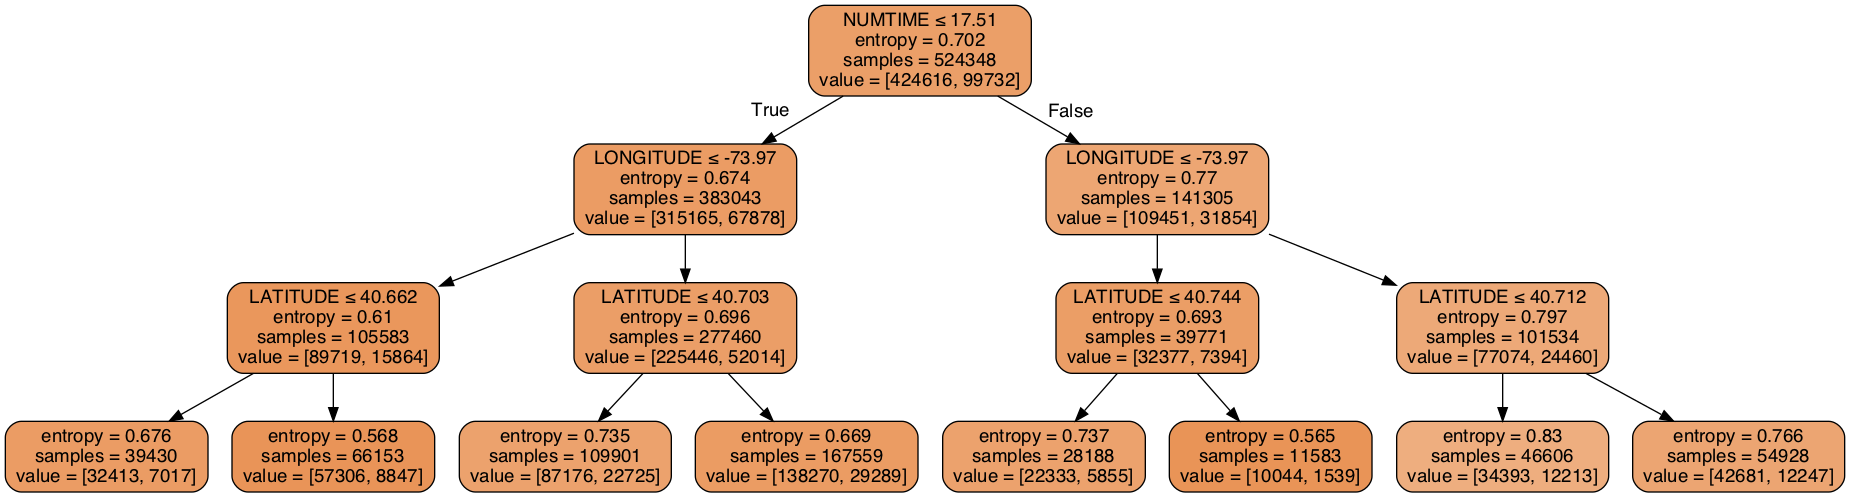

In [17]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [18]:
conda install graphviz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


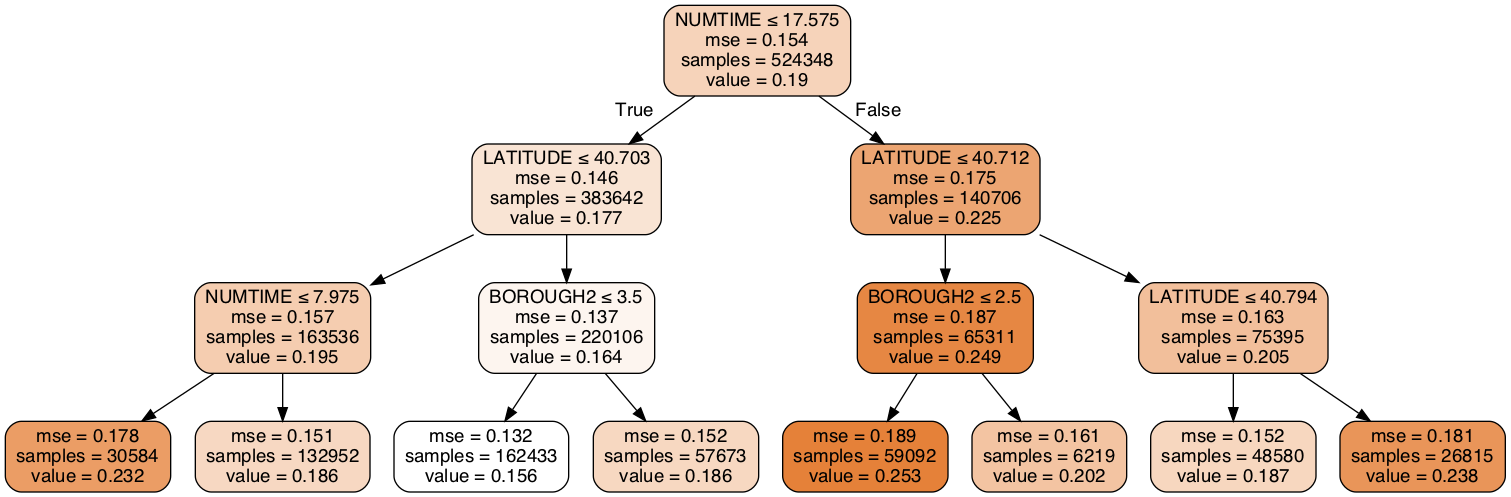

In [19]:
X_feat = data[['NUMTIME','LATITUDE','LATITUDE','BOROUGH2']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeRegressor(max_depth=3,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [20]:
pd.DataFrame({'feature':['NUMTIME','LATITUDE','LONGITUDE','BOROUGH2'], 'importance':t.feature_importances_})



,feature,importance
0,NUMTIME,0.536474
1,LATITUDE,0.081202
2,LONGITUDE,0.282734
3,BOROUGH2,0.099591


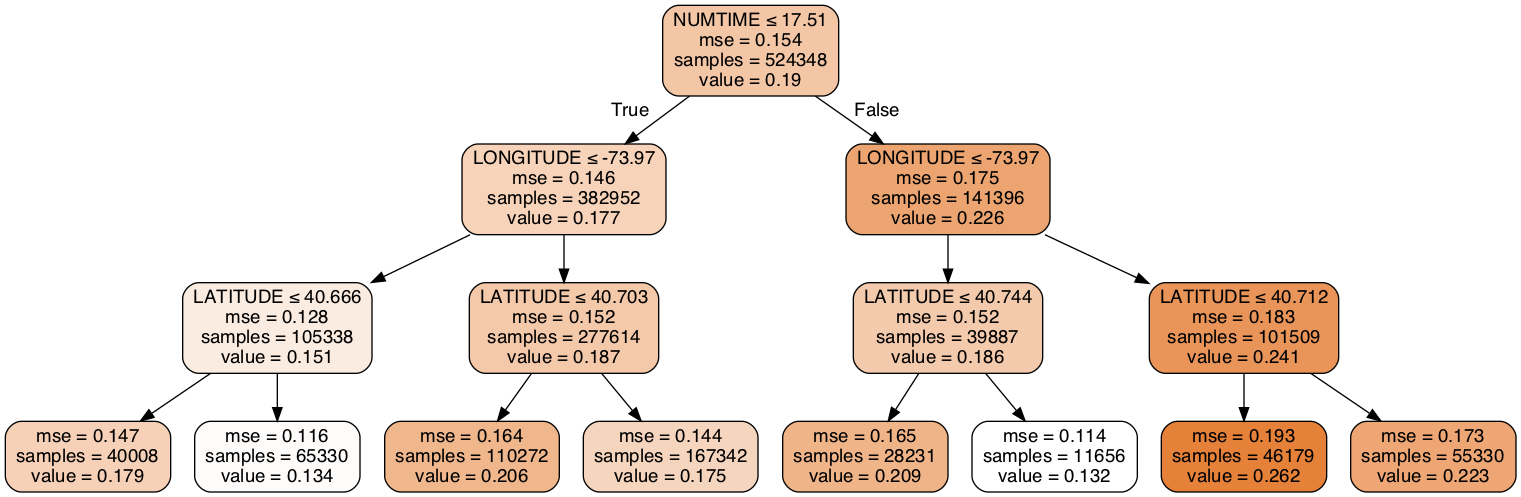

In [21]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeRegressor(max_depth=3,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.809815
2   0.809815
3   0.809815
4   0.809815
5   0.809815
10  0.808930
15  0.800188
20  0.777920
25  0.750618
30  0.726245


In [23]:
pd.DataFrame({'feature':['NUMTIME','LATITUDE','LONGITUDE'], 'importance':t.feature_importances_})


,feature,importance
0,NUMTIME,0.382175
1,LATITUDE,0.323735
2,LONGITUDE,0.294089


In [25]:
#get data
X_feat = data[['NUMTIME','LONGITUDE']]

y = data['affected']

#split into train/test
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,
                                                                          test_size=0.3,
                                                                          random_state=2)

# generate random forest with grid search
rf_slump = RandomForestRegressor(n_estimators=100)

########################################

#train random forests
rf_slump.fit(X_feat_train,y_feat_train)


#get rmse on test set
print("test error for slump: ",np.sqrt(mean_squared_error(y_feat_test,
                                                          rf_slump.predict(X_feat_test))))


KeyboardInterrupt: 

In [ ]:
#get data
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE','BOROUGH2']]

y = data['affected']

#split into train/test
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,
                                                                          test_size=0.3,
                                                                          random_state=2)

# generate random forest with grid search
rf_slump = RandomForestRegressor(n_estimators=100)

########################################

#train random forests
rf_slump.fit(X_feat_train,y_feat_train)


#get rmse on test set
print("test error for slump: ",np.sqrt(mean_squared_error(y_feat_test,
                                                          rf_slump.predict(X_feat_test))))



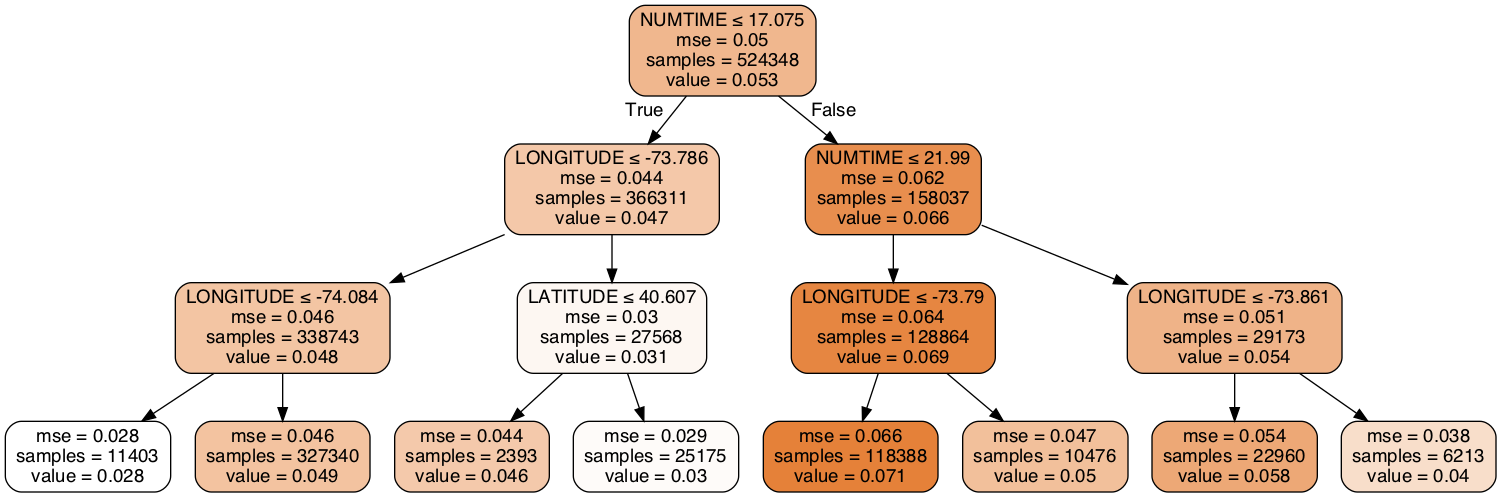

In [25]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeRegressor(max_depth=3,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeRegressor(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.001668
2   0.002157
3   0.002387
4   0.002426
5   0.002340
10 -0.007467
15 -0.060129
20 -0.213922
25 -0.463949
30 -0.724684


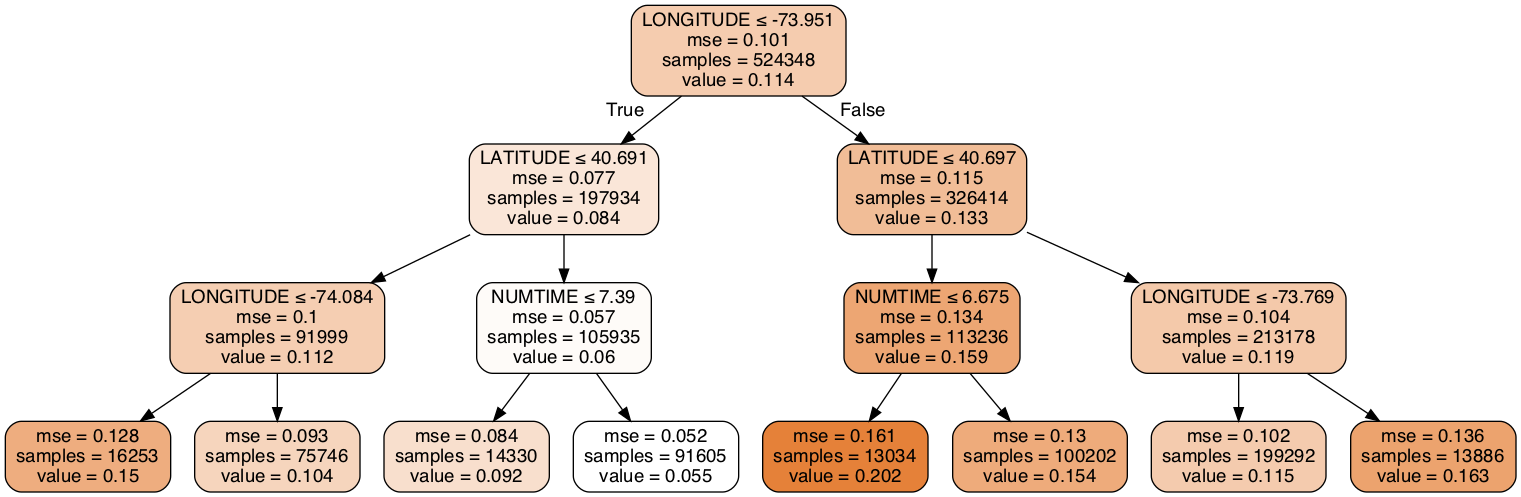

In [27]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeRegressor(max_depth=3,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [28]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeRegressor(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.005257
2   0.010289
3   0.012058
4   0.013555
5   0.014582
10  0.010477
15 -0.049487
20 -0.228894
25 -0.493302
30 -0.724969


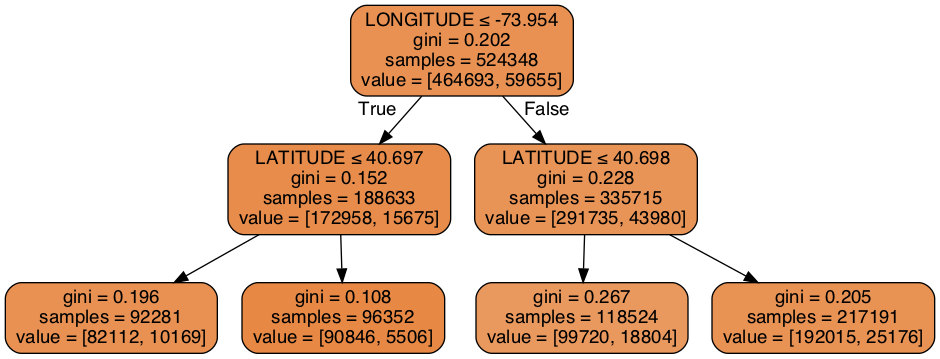

In [29]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [30]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.882972
2   0.882972
3   0.882972
4   0.882972
5   0.882972
10  0.881995
15  0.876594
20  0.861048
25  0.837636
30  0.818763


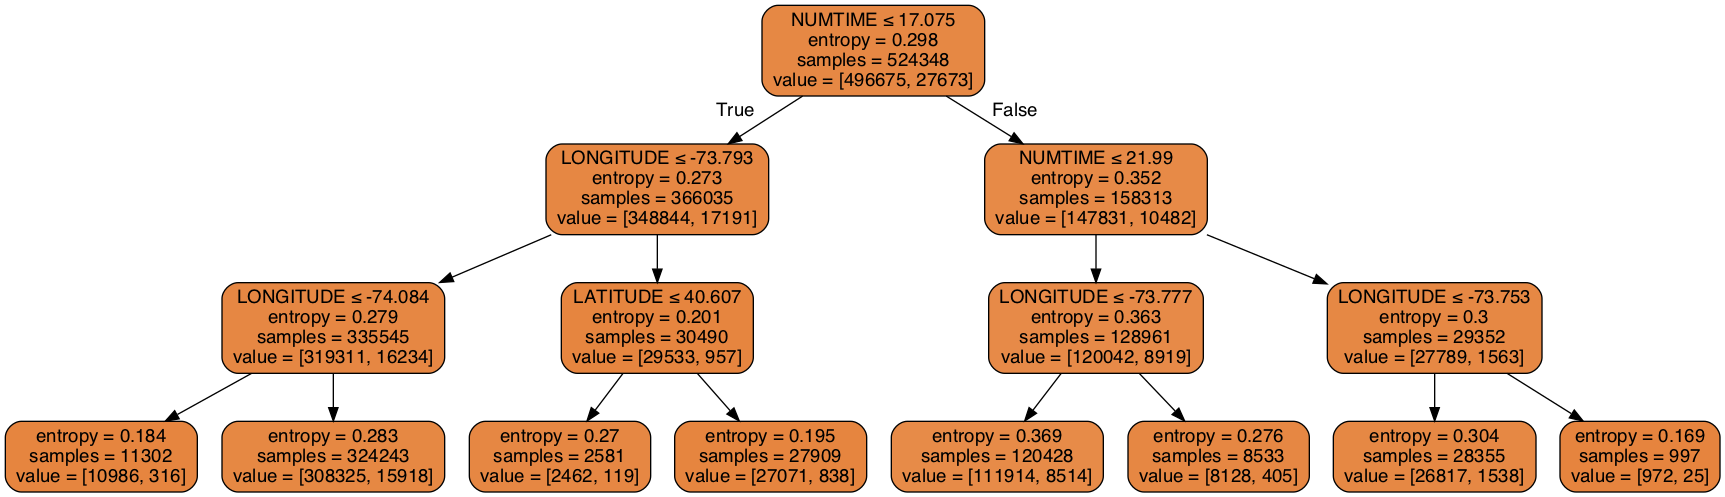

In [31]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [32]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.947257
2   0.947257
3   0.947257
4   0.947257
5   0.947257
10  0.946860
15  0.944816
20  0.938484
25  0.928086
30  0.916766


In [33]:
print("Null accuracy on the test set: ",y_test.mean())

Null accuracy on the test set:  0.05274319541071647


In [35]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['NUMBER OF PEDESTRIANS INJURED']
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  6.0min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,1,1,10,0.947394
1,entropy,3,2,30,0.947394
2,entropy,3,3,50,0.947394
3,entropy,3,3,40,0.947394
4,entropy,3,3,30,0.947394
5,entropy,3,3,20,0.947394
6,entropy,3,3,10,0.947394
7,entropy,3,2,60,0.947394
8,entropy,3,2,50,0.947394
9,entropy,3,2,40,0.947394


In [36]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['NUMBER OF MOTORIST INJURED']
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  6.9min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,1,1,10,0.885945
1,entropy,3,1,10,0.885945
2,entropy,3,2,20,0.885945
3,entropy,3,2,10,0.885945
4,entropy,3,1,60,0.885945
5,entropy,3,1,50,0.885945
6,entropy,3,1,40,0.885945
7,entropy,3,1,30,0.885945
8,entropy,3,1,20,0.885945
9,entropy,2,3,60,0.885945


In [60]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['affected']
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  6.8min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,1,1,10,0.809771
1,entropy,3,2,20,0.809771
2,entropy,2,1,60,0.809771
3,entropy,2,2,10,0.809771
4,entropy,2,2,20,0.809771
5,entropy,2,2,30,0.809771
6,entropy,2,2,40,0.809771
7,entropy,2,2,50,0.809771
8,entropy,2,2,60,0.809771
9,entropy,2,3,10,0.809771


In [85]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['NUMBER OF CYCLIST INJURED']
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  5.5min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,entropy,20,2,20,0.976193
1,gini,1,1,10,0.976191
2,entropy,3,2,50,0.976191
3,entropy,4,1,10,0.976191
4,entropy,3,3,60,0.976191
5,entropy,3,3,50,0.976191
6,entropy,3,3,40,0.976191
7,entropy,3,3,30,0.976191
8,entropy,3,3,20,0.976191
9,entropy,3,3,10,0.976191


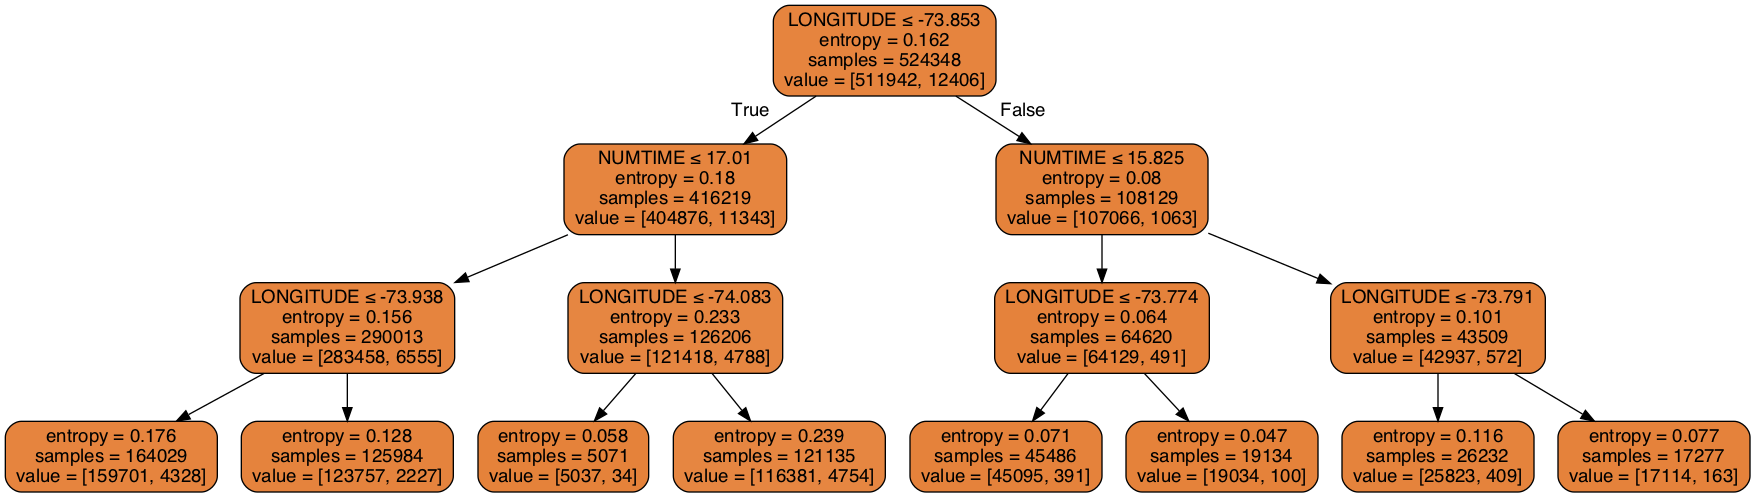

In [13]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF CYCLIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF CYCLIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.975536
2   0.975536
3   0.975536
4   0.975528
5   0.975528
10  0.975253
15  0.973430
20  0.967869
25  0.961133
30  0.956236


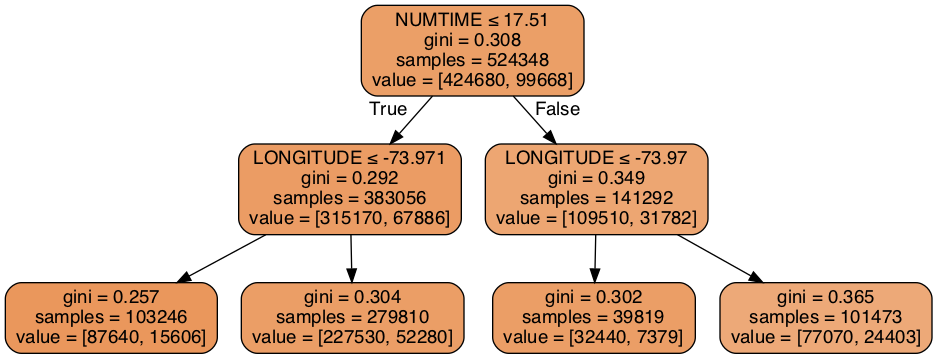

In [15]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=10)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [16]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.809243
2   0.809243
3   0.809243
4   0.809243
5   0.809243
10  0.808068
15  0.799501
20  0.778119
25  0.752121
30  0.728503


In [17]:
print("Null accuracy on the test set: ",y_test.mean())

Null accuracy on the test set:  0.19075735383864276


In [18]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeRegressor(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.002928
2   0.005080
3   0.007145
4   0.008599
5   0.009615
10  0.003992
15 -0.060160
20 -0.245137
25 -0.496213
30 -0.706834


In [19]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))

cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

Null accuracy on the test set:  0.052933906993775176
Sensitivity/Recall (TPR):  0.9470660930062248
Precision (PPV):  0.9470660930062248


array([[124149,      0],
       [  6939,      0]])

In [20]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))

cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

Null accuracy on the test set:  0.1902462467960454
Sensitivity/Recall (TPR):  0.8097537532039546
Precision (PPV):  0.8097537532039546


array([[106149,      0],
       [ 24939,      0]])

In [37]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))

cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

Null accuracy on the test set:  0.11472445990479678
Sensitivity/Recall (TPR):  0.8852755400952033
Precision (PPV):  0.8852755400952033


array([[116049,      0],
       [ 15039,      0]])

In [44]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF CYCLIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))

Null accuracy on the test set:  0.023915232515562067
Sensitivity/Recall (TPR):  0.976084767484438
Precision (PPV):  0.976084767484438


In [45]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

array([[127953,      0],
       [  3135,      0]])

In [50]:
predicted_probs_t = t.predict_proba(X_test)
predictions_t = t.predict(X_test)
y_test_pred = t.predict(X_test)
y_test_pred = y_test_pred.astype('int32')



fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_test_pred[:,1])


IndexError: too many indices for array